# PROYECTO AIRBNB DE DEEP LEARNING

Abordaremos la resolución de un problema real mediante el uso de técnicas de Deep Learning. En particular, nos centraremos en predecir el precio de habitaciones en AirBnB, utilizando todas las características disponibles en el conjunto de datos.

## 1. PREPROCESADO DE LOS DATOS
* En primer lugar, se descargan y cargan los datos.

In [ ]:
import cv2
import numpy as np
import pandas as pd
import imageio.v3 as io
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from typing import Optional, Union

from google.colab import files
from google.colab import drive
import numpy as np
import pandas as pd

drive.mount('/content/drive')
airbnb_imgs = np.load('/content/drive/MyDrive/images.npy')
airbnb_data = pd.read_csv("/content/drive/MyDrive/airbnb_data.csv", sep=';')
idxs = np.load('/content/drive/MyDrive/indices.npy')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##La primera vez que se ejecuta el código, se suben los datos de la siguiente forma
#uploaded = files.upload()
#airbnb_data = pd.read_csv("dataset.csv",delimiter=';')

* En segundo lugar, se eliminan aquellas instancias que no tengan precio y aquellas cuyo precio se considere un outlayer.


In [ ]:
airbnb_data = airbnb_data.dropna(subset=['price'])
airbnb_data['price'] = airbnb_data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_data = airbnb_data[airbnb_data['price'] < 1000]

In [ ]:
## Sólo se ejecuta la primera vez
#def download_images(paths: list,
#                    canvas: tuple = (224, 224),
#                    nb_channels: int = 3,
#                    max_imgs: Optional[int] = None
#                    ) -> tuple:
#
#  n_images = len(paths) if not max_imgs else max_imgs
#  images = np.zeros((n_images, canvas[0], canvas[1], nb_channels),
#                       dtype=np.uint8)
#  downloaded_idxs = []
#
#  for i_img, url in enumerate(tqdm(paths, total=n_images)):
#    if i_img >= n_images:
#      break
#    try:
#        img = io.imread(url)
#        img = cv2.resize(img, (canvas[0], canvas[1]))
#        downloaded_idxs.append(i_img)
#        images[i_img] = img
#    except (IOError, ValueError) as e:  # Unavailable url / conversion error
#        pass
#  return images[downloaded_idxs], downloaded_idxs

* Se eliminan los duplicados

In [ ]:
airbnb_data = airbnb_data.drop_duplicates(subset='id')
airbnb_data.shape

(3565, 72)

In [ ]:
##La primera vez que se descargan las imágenes
#images, idxs = download_images(airbnb_data['picture_url'], max_imgs=3600)
#images = images.astype("float32") / 255.
#images.shape

In [ ]:
##La primera vez que se guardan los índices, imágenes y datos.
#from google.colab import drive
#drive.mount('/content/drive')
#np.save('/content/drive/MyDrive/indices.npy', idxs)
#np.save('/content/drive/MyDrive/images.npy', images)
#airbnb_data.to_csv('airbnb_data.csv', sep=';', index=False)

In [ ]:
#!cp images.npy /content/drive/MyDrive/images.npy
#!cp airbnb_data.csv /content/drive/MyDrive/airbnb_data.csv
#!ls -lah images* airbnb*

* A continuación, se eliminan aquellas instancias de las cuales no se hayan podido descargar las imágenes.

In [ ]:
airbnb_data = airbnb_data.iloc[idxs]
airbnb_data.shape, airbnb_imgs.shape

((3096, 72), (3096, 224, 224, 3))

* Se eliminan aquellas columnas de características que consideramos irrelevantes para la predicción de la variable 'price'.

In [ ]:
airbnb_data = airbnb_data.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source',
       'picture_url', 'host_id', 'host_url', 'host_name',
       'host_location', 'host_about',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'latitude', 'longitude',
        'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped', 'license',
        'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','neighbourhood_cleansed'], axis=1)

* Ahora, ya podemos dividir el dataset en train, test y validation, tanto de los datos tabulares como de las imágenes.

In [ ]:
y_airbnb = airbnb_data['price']
x_airbnb = airbnb_data.drop(['price'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x_airbnb, y_airbnb, test_size = 0.2 , shuffle=True, random_state=0 )
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print("El conjunto de entrenamiento de los datos tabulares tiene dimensiones: ", x_train.shape)
print("El conjunto de validación de los datos tabulares tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

#x_train.to_csv('airbnb_train.csv')
#y_test.to_csv('airbnb_test.csv')


El conjunto de entrenamiento de los datos tabulares tiene dimensiones:  (1980, 39)
El conjunto de validación de los datos tabulares tiene dimensiones:  (496, 39)
El conjunto de test tiene dimensiones:  (620, 39)


In [ ]:
imgs_train, imgs_test, y_train_im, y_test_im =  train_test_split( airbnb_imgs, y_airbnb, test_size = 0.2 , shuffle=True, random_state=0 )
imgs_train, imgs_val, y_train_im, y_val_im =  train_test_split( imgs_train, y_train_im, test_size = 0.2 , shuffle=True, random_state=0 )

print("El conjunto de entrenamiento de las imágenes tiene dimensiones: ", imgs_train.shape)
print("El conjunto de validación de las imágenes tiene dimensiones: ", imgs_val.shape)
print("El conjunto de test tiene dimensiones: ",imgs_test.shape)

El conjunto de entrenamiento de las imágenes tiene dimensiones:  (1980, 224, 224, 3)
El conjunto de validación de las imágenes tiene dimensiones:  (496, 224, 224, 3)
El conjunto de test tiene dimensiones:  (620, 224, 224, 3)


* Posteriormente, eliminamos o imputamos los valores nulos, en función de la conveniencia.

In [ ]:
airbnb_data = x_train
total = airbnb_data.shape[0]

for i in airbnb_data.columns:
    nulos = airbnb_data[i].isnull().sum()
    print(f'En la columna {i} hay un {(nulos*100/total).round(2)}% de nulos.')

En la columna host_since hay un 0.0% de nulos.
En la columna host_response_time hay un 7.47% de nulos.
En la columna host_response_rate hay un 7.47% de nulos.
En la columna host_acceptance_rate hay un 6.46% de nulos.
En la columna host_is_superhost hay un 1.21% de nulos.
En la columna host_has_profile_pic hay un 0.0% de nulos.
En la columna host_identity_verified hay un 0.0% de nulos.
En la columna neighbourhood hay un 38.94% de nulos.
En la columna neighbourhood_group_cleansed hay un 100.0% de nulos.
En la columna property_type hay un 0.0% de nulos.
En la columna room_type hay un 0.0% de nulos.
En la columna accommodates hay un 0.0% de nulos.
En la columna bathrooms hay un 100.0% de nulos.
En la columna bathrooms_text hay un 0.0% de nulos.
En la columna bedrooms hay un 100.0% de nulos.
En la columna beds hay un 1.67% de nulos.
En la columna amenities hay un 0.0% de nulos.
En la columna minimum_nights hay un 0.0% de nulos.
En la columna maximum_nights hay un 0.0% de nulos.
En la column

Aquellas columnas con un porcentaje elevado de nulos serán eliminadas, ya que en estos casos no tiene mucho sentido imputar los datos.

In [ ]:
airbnb_data = airbnb_data.drop(['neighbourhood','neighbourhood_group_cleansed','bathrooms','bedrooms', 'host_since','first_review','last_review','amenities'], axis=1)

En cambio, en las demás se aplicará la imputación mediante la media o la moda según convenga.

In [ ]:
airbnb_data['host_response_time'].fillna(airbnb_data['host_response_time'].mode()[0], inplace=True)
airbnb_data['host_response_rate'].fillna(airbnb_data['host_response_rate'].mode()[0], inplace=True)
airbnb_data['host_acceptance_rate'].fillna(airbnb_data['host_acceptance_rate'].mode()[0], inplace=True)
airbnb_data['host_acceptance_rate'].fillna(airbnb_data['host_acceptance_rate'].mode()[0], inplace=True)
airbnb_data['host_is_superhost'].fillna(airbnb_data['host_is_superhost'].mode()[0], inplace=True)
airbnb_data['beds'].fillna(airbnb_data['beds'].mode()[0], inplace=True)
airbnb_data['review_scores_rating'].fillna(airbnb_data['review_scores_rating'].mean(), inplace=True)
airbnb_data['review_scores_accuracy'].fillna(airbnb_data['review_scores_accuracy'].mean(), inplace=True)
airbnb_data['review_scores_cleanliness'].fillna(airbnb_data['review_scores_cleanliness'].mean(), inplace=True)
airbnb_data['review_scores_checkin'].fillna(airbnb_data['review_scores_checkin'].mean(), inplace=True)
airbnb_data['review_scores_communication'].fillna(airbnb_data['review_scores_communication'].mean(), inplace=True)
airbnb_data['review_scores_location'].fillna(airbnb_data['review_scores_location'].mean(), inplace=True)
airbnb_data['review_scores_value'].fillna(airbnb_data['review_scores_value'].mean(), inplace=True)
airbnb_data['reviews_per_month'].fillna(airbnb_data['reviews_per_month'].mean(), inplace=True)

<ipython-input-16-82c9694207d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data['host_response_time'].fillna(airbnb_data['host_response_time'].mode()[0], inplace=True)
<ipython-input-16-82c9694207d8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

* Codificamos aquellas columnas que lo necesiten, usando tanto Label Encoding como One-hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_room = LabelEncoder()
airbnb_data.loc[:,'room_type'] = le_room.fit_transform(airbnb_data['room_type'])
airbnb_data.loc[:,'host_response_time'] = le_room.fit_transform(airbnb_data['host_response_time'])


In [ ]:
airbnb_data['host_is_superhost'] = airbnb_data['host_is_superhost'].replace({'f': 0, 't': 1})
airbnb_data['host_has_profile_pic'] = airbnb_data['host_has_profile_pic'].replace({'f': 0, 't': 1})
airbnb_data['host_identity_verified'] = airbnb_data['host_identity_verified'].replace({'f': 0, 't': 1})
airbnb_data['instant_bookable'] = airbnb_data['instant_bookable'].replace({'f': 0, 't': 1})

<ipython-input-18-006bc9b799a7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  airbnb_data['host_is_superhost'] = airbnb_data['host_is_superhost'].replace({'f': 0, 't': 1})
<ipython-input-18-006bc9b799a7>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  airbnb_data['host_has_profile_pic'] = airbnb_data['host_has_profile_pic'].replace({'f': 0, 't': 1})
<ipython-input-18-006bc9b799a7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly ca

In [ ]:
def f_property_type(property_type):
    if "private room" in str(property_type).lower():
        return "Private room"
    elif "entire" in str(property_type).lower():
        return "Entire property"
    else:
        return "Others"

airbnb_data['property_type'] = airbnb_data['property_type'].apply(f_property_type)

In [ ]:
airbnb_data = pd.get_dummies(airbnb_data, columns=['property_type'])
airbnb_data = airbnb_data.drop("property_type_Others",axis=1)

* Se cambian los tipos de los datos a los más convenientes.

In [ ]:
airbnb_data['host_response_time']=airbnb_data['host_response_time'].astype(int)
airbnb_data['host_response_rate']=airbnb_data['host_response_rate'].replace({'%':''}, regex = True)
airbnb_data['host_response_rate']=airbnb_data['host_response_rate'].astype(float)
airbnb_data['host_response_rate']=airbnb_data['host_response_rate']/100
airbnb_data['host_acceptance_rate']=airbnb_data['host_acceptance_rate'].replace({'%':''}, regex = True)
airbnb_data['host_acceptance_rate']=airbnb_data['host_acceptance_rate'].astype(float)
airbnb_data['host_acceptance_rate']=airbnb_data['host_acceptance_rate']/100
airbnb_data['room_type']=airbnb_data['room_type'].astype(int)
airbnb_data['instant_bookable']=airbnb_data['instant_bookable'].astype(int)

* Creamos una columna booleana para indicar si los baños son compartidos o privados.

In [ ]:
airbnb_data['Shared bathroom']=airbnb_data['bathrooms_text'].apply(lambda x: 1 if "shared" in str(x).lower() else 0)

* Limpiamos la columna de 'bathroom_text' para convertirla a float.

In [ ]:
airbnb_data['bathrooms_text']=airbnb_data['bathrooms_text'].replace({'baths':'','bath':'','shared':'','private':'','Half-':'0.5'}, regex = True)
airbnb_data['bathrooms_text']=airbnb_data['bathrooms_text'].astype(float)

In [ ]:
x_train = airbnb_data

* Llevamos a cabo las mismas transformaciones en los datos de validación y test.

In [ ]:
x_val = x_val.drop(['neighbourhood','neighbourhood_group_cleansed','bathrooms','bedrooms', 'host_since','first_review','last_review','amenities'], axis=1)

x_val['host_response_time'].fillna(x_val['host_response_time'].mode()[0], inplace=True)
x_val['host_response_rate'].fillna(x_val['host_response_rate'].mode()[0], inplace=True)
x_val['host_acceptance_rate'].fillna(x_val['host_acceptance_rate'].mode()[0], inplace=True)
x_val['host_acceptance_rate'].fillna(x_val['host_acceptance_rate'].mode()[0], inplace=True)
x_val['host_is_superhost'].fillna(x_val['host_is_superhost'].mode()[0], inplace=True)
x_val['beds'].fillna(x_val['beds'].mode()[0], inplace=True)
x_val['review_scores_rating'].fillna(x_val['review_scores_rating'].mean(), inplace=True)
x_val['review_scores_accuracy'].fillna(x_val['review_scores_accuracy'].mean(), inplace=True)
x_val['review_scores_cleanliness'].fillna(x_val['review_scores_cleanliness'].mean(), inplace=True)
x_val['review_scores_checkin'].fillna(x_val['review_scores_checkin'].mean(), inplace=True)
x_val['review_scores_communication'].fillna(x_val['review_scores_communication'].mean(), inplace=True)
x_val['review_scores_location'].fillna(x_val['review_scores_location'].mean(), inplace=True)
x_val['review_scores_value'].fillna(x_val['review_scores_value'].mean(), inplace=True)
x_val['reviews_per_month'].fillna(x_val['reviews_per_month'].mean(), inplace=True)
le_room = LabelEncoder()
x_val.loc[:,'room_type'] = le_room.fit_transform(x_val['room_type'])
x_val.loc[:,'host_response_time'] = le_room.fit_transform(x_val['host_response_time'])
x_val['host_is_superhost'] = x_val['host_is_superhost'].replace({'f': 0, 't': 1})
x_val['host_has_profile_pic'] = x_val['host_has_profile_pic'].replace({'f': 0, 't': 1})
x_val['host_identity_verified'] = x_val['host_identity_verified'].replace({'f': 0, 't': 1})
x_val['instant_bookable'] = x_val['instant_bookable'].replace({'f': 0, 't': 1})

x_val['property_type'] = x_val['property_type'].apply(f_property_type)

x_val = pd.get_dummies(x_val, columns=['property_type'])
x_val = x_val.drop("property_type_Others",axis=1)
x_val['host_response_time']=x_val['host_response_time'].astype(int)
x_val['host_response_rate']=x_val['host_response_rate'].replace({'%':''}, regex = True)
x_val['host_response_rate']=x_val['host_response_rate'].astype(float)
x_val['host_response_rate']=x_val['host_response_rate']/100
x_val['host_acceptance_rate']=x_val['host_acceptance_rate'].replace({'%':''}, regex = True)
x_val['host_acceptance_rate']=x_val['host_acceptance_rate'].astype(float)
x_val['host_acceptance_rate']=x_val['host_acceptance_rate']/100
x_val['room_type']=x_val['room_type'].astype(int)
x_val['instant_bookable']=x_val['instant_bookable'].astype(int)

x_val['Shared bathroom']=x_val['bathrooms_text'].apply(lambda x: 1 if "shared" in str(x).lower() else 0)

x_val['bathrooms_text']=x_val['bathrooms_text'].replace({'baths':'','bath':'','shared':'','private':'','Half-':'0.5'}, regex = True)
x_val['bathrooms_text']=x_val['bathrooms_text'].astype(float)


<ipython-input-25-9f8b68e71c42>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_val['host_response_time'].fillna(x_val['host_response_time'].mode()[0], inplace=True)
<ipython-input-25-9f8b68e71c42>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
x_test = x_test.drop(['neighbourhood','neighbourhood_group_cleansed','bathrooms','bedrooms', 'host_since','first_review','last_review','amenities'], axis=1)

x_test['host_response_time'].fillna(x_test['host_response_time'].mode()[0], inplace=True)
x_test['host_response_rate'].fillna(x_test['host_response_rate'].mode()[0], inplace=True)
x_test['host_acceptance_rate'].fillna(x_test['host_acceptance_rate'].mode()[0], inplace=True)
x_test['host_acceptance_rate'].fillna(x_test['host_acceptance_rate'].mode()[0], inplace=True)
x_test['host_is_superhost'].fillna(x_test['host_is_superhost'].mode()[0], inplace=True)
x_test['beds'].fillna(x_test['beds'].mode()[0], inplace=True)
x_test['review_scores_rating'].fillna(x_test['review_scores_rating'].mean(), inplace=True)
x_test['review_scores_accuracy'].fillna(x_test['review_scores_accuracy'].mean(), inplace=True)
x_test['review_scores_cleanliness'].fillna(x_test['review_scores_cleanliness'].mean(), inplace=True)
x_test['review_scores_checkin'].fillna(x_test['review_scores_checkin'].mean(), inplace=True)
x_test['review_scores_communication'].fillna(x_test['review_scores_communication'].mean(), inplace=True)
x_test['review_scores_location'].fillna(x_test['review_scores_location'].mean(), inplace=True)
x_test['review_scores_value'].fillna(x_test['review_scores_value'].mean(), inplace=True)
x_test['reviews_per_month'].fillna(x_test['reviews_per_month'].mean(), inplace=True)
le_room = LabelEncoder()
x_test.loc[:,'room_type'] = le_room.fit_transform(x_test['room_type'])
x_test.loc[:,'host_response_time'] = le_room.fit_transform(x_test['host_response_time'])
x_test['host_is_superhost'] = x_test['host_is_superhost'].replace({'f': 0, 't': 1})
x_test['host_has_profile_pic'] = x_test['host_has_profile_pic'].replace({'f': 0, 't': 1})
x_test['host_identity_verified'] = x_test['host_identity_verified'].replace({'f': 0, 't': 1})
x_test['instant_bookable'] = x_test['instant_bookable'].replace({'f': 0, 't': 1})

x_test['property_type'] = x_test['property_type'].apply(f_property_type)

x_test = pd.get_dummies(x_test, columns=['property_type'])
x_test = x_test.drop("property_type_Others",axis=1)
x_test['host_response_time']=x_test['host_response_time'].astype(int)
x_test['host_response_rate']=x_test['host_response_rate'].replace({'%':''}, regex = True)
x_test['host_response_rate']=x_test['host_response_rate'].astype(float)
x_test['host_response_rate']=x_test['host_response_rate']/100
x_test['host_acceptance_rate']=x_test['host_acceptance_rate'].replace({'%':''}, regex = True)
x_test['host_acceptance_rate']=x_test['host_acceptance_rate'].astype(float)
x_test['host_acceptance_rate']=x_test['host_acceptance_rate']/100
x_test['room_type']=x_test['room_type'].astype(int)
x_test['instant_bookable']=x_test['instant_bookable'].astype(int)

x_test['Shared bathroom']=x_test['bathrooms_text'].apply(lambda x: 1 if "shared" in str(x).lower() else 0)

x_test['bathrooms_text']=x_test['bathrooms_text'].replace({'baths':'','bath':'','shared':'','private':'','Half-':'0.5'}, regex = True)
x_test['bathrooms_text']=x_test['bathrooms_text'].astype(float)


<ipython-input-26-ab8213a5a893>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['host_response_time'].fillna(x_test['host_response_time'].mode()[0], inplace=True)
<ipython-input-26-ab8213a5a893>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

* También vamos a crear un segundo dataset con menos variables para crear otro modelo posteriormente.

In [ ]:
x_train2 = x_train.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','accommodates','minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d'], axis=1)

x_val2 = x_val.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','accommodates','minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d'],axis=1)

x_test2 = x_test.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','accommodates','minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d'],axis=1)


In [ ]:
x_val.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'property_type_Entire property', 'property_type_Private room',
       'Shared bathroom'],
      dtype='object')

In [ ]:
x_train.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'room_type', 'accommodates', 'bathrooms_text', 'beds', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'property_type_Entire property', 'property_type_Private room',
       'Shared bathroom'],
      dtype='object')

* Normalizamos los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

scaler2 = StandardScaler()
x_train2 = scaler2.fit_transform(x_train2)
x_val2 = scaler2.transform(x_val2)
x_test2 = scaler2.transform(x_test2)

# 2. MODELO DE DEEP LEARNING PARA DATOS TABULARES (1D)

* Empezamos con un modelo sencillo de varias capas densas.

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(11)
tf.random.set_seed(11)

# Hiper-parámetros de nuestra red
lr = 0.001
n_epochs = 200
batch_size = 128

# Implementamos la red empleando Keras
model = Sequential()
model.add(Dense(64, input_shape=(x_train.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="linear"))


# Compilamos y entrenamos el modelo SGD
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=lr), metrics=["mse"])
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=n_epochs, batch_size=batch_size)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 44779.9648 - mse: 44779.9648 - val_loss: 51680.9258 - val_mse: 51680.9258
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43631.2148 - mse: 43631.2148 - val_loss: 49722.6758 - val_mse: 49722.6758
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41174.6992 - mse: 41174.6992 - val_loss: 45253.9062 - val_mse: 45253.9062
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35780.7422 - mse: 35780.7422 - val_loss: 36182.9453 - val_mse: 36182.9453
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25980.9043 - mse: 25980.9043 - val_loss: 23589.3750 - val_mse: 23589.3750
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15332.0137 - mse: 15332.0137 - val_loss: 17219.4531 - val_mse: 17219.4531
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11750.3086 - mse: 11750.3086 - val_loss: 15950.1572 - val_mse: 15950.1572
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10671.651

* Evaluamos el modelo con métricas de regresión

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.layers import Dropout

predictions = model.predict(x_test, batch_size=batch_size)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Squared Error: 12510.807866984134
Mean Absolute Error: 68.13065834737593


* Dibujamos el MSE durante el entrenamiento

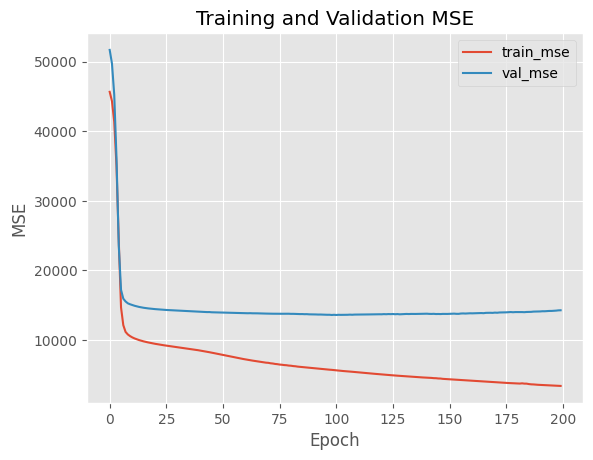

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["mse"], label="train_mse")
plt.plot(np.arange(0, n_epochs), H.history["val_mse"], label="val_mse")
plt.title("Training and Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

* Probamos un segundo modelo con menos características en el dataset para evitar el overfitting y con más redes neuronales, dropout y learning decay.

In [ ]:
np.random.seed(11)
tf.random.set_seed(11)

# Hiper-parámetros de nuestra red
lr = 0.001
n_epochs = 125
decay_rate = lr / n_epochs
optimizer = Adam(learning_rate=lr, decay=decay_rate)

# Implementamos la red empleando Keras
tabular_model = Sequential()
tabular_model.add(Dense(128, input_shape=(x_train2.shape[1],), activation="relu"))
model.add(Dropout(0.2))
tabular_model.add(Dense(64, input_shape=(x_train2.shape[1],), activation="relu"))
model.add(Dropout(0.2))
tabular_model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
tabular_model.add(Dense(16, activation="relu"))
tabular_model.add(Dense(8, activation="relu"))
tabular_model.add(Dense(1, activation="linear"))


# Compilamos y entrenamos el modelo SGD
x_train = airbnb_data
tabular_model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mse"])
H_tabular = tabular_model.fit(x_train2, y_train, validation_data=(x_val2, y_val), epochs=n_epochs, batch_size=batch_size)

Epoch 1/125


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 45043.8828 - mse: 45043.8828 - val_loss: 52158.4844 - val_mse: 52158.4844
Epoch 2/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44149.8672 - mse: 44149.8672 - val_loss: 49892.2344 - val_mse: 49892.2344
Epoch 3/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41009.5430 - mse: 41009.5430 - val_loss: 42175.7656 - val_mse: 42175.7656
Epoch 4/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31449.3926 - mse: 31449.3926 - val_loss: 24498.6895 - val_mse: 24498.6895
Epoch 5/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15918.5234 - mse: 15918.5234 - val_loss: 16760.1621 - val_mse: 16760.1621
Epoch 6/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12517.2432 - mse: 12517.2432 - val_loss: 15949.6211 - val_mse: 15949.6211
Epoch 7/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11148.0439 - mse: 11148.0439 - val_loss: 15304.9297 - val_mse: 15304.9297
Epoch 8/125
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10682.3223 - mse: 106

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predictions = tabular_model.predict(x_test2, batch_size=batch_size)

# Evaluamos el modelo con métricas de regresión
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Mean Squared Error: 10132.282078474387
Mean Absolute Error: 68.13065834737593


* Dibujamos el MSE durante el entrenamiento

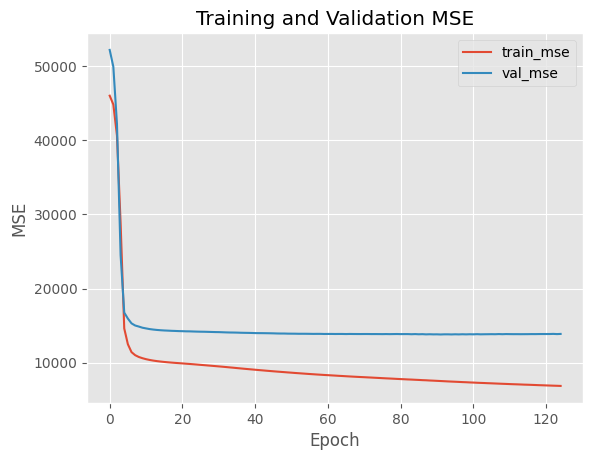

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H_tabular.history["mse"], label="train_mse")
plt.plot(np.arange(0, n_epochs), H_tabular.history["val_mse"], label="val_mse")
plt.title("Training and Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Parece que la generalización del modelo ha mejorado, así como el MSE.

## 3. MODELO DE DEEP LEARNING PARA DATOS 2D / IMÁGENES

* Normalización de los datos

In [ ]:
imgs_train = imgs_train/255
imgs_test = imgs_test/255
imgs_val = imgs_val/255

In [ ]:
# Centramos los datos (le restamos la media)
x_train_mean = np.mean(imgs_train, axis=0)
x_train_cent = imgs_train - x_train_mean

# Normalizamos
x_train_std = np.std(imgs_train, axis=0)
x_train_norm = x_train_cent / x_train_std

In [ ]:
x_test_norm = (imgs_test - x_train_mean) / x_train_std
x_val_norm =  (imgs_val - x_train_mean) / x_train_std

## 3.1. CNN pre-entrenado: VGG16

* En primer lugar, redimensionamos los datos para el modelo VGG16

In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# Redimensionamos a las dimensiones mínimas permitidas por la VGG16

input_shape = (48, 48, 3)

# resize train set
X_train_resized = []
for img in x_train_norm:
  X_train_resized.append(np.resize(img, input_shape))

X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize val set
X_val_resized = []
for img in x_val_norm:
  X_val_resized.append(np.resize(img, input_shape))

X_val_resized = np.array(X_val_resized)
print(X_val_resized.shape)

# resize test set
X_test_resized = []
for img in x_test_norm:
  X_test_resized.append(np.resize(img, input_shape))

X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(1980, 48, 48, 3)
(496, 48, 48, 3)
(620, 48, 48, 3)


* Construimos el modelo base

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2. TRANSFER LEARNING

* Congelamos todas las capas de nuestro modelo base para que no se entrenen y añadimos un Dropout y una capa de regresión

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation="relu", name="fc1")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="linear", name="predictions")(x)
cnn_model = Model(base_model.input, x)

# compilamos el modelo
cnn_model.compile(loss="mean_squared_error", optimizer=Adam(0.001), metrics=["mse"])

# vemos la estructura del modelo
cnn_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 535,562 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

* Entrenamos el modelo pre-entrenado con Transfer Learning

In [ ]:
epochs = 20
batch_size = 512

H_cnn = cnn_model.fit(X_train_resized, y_train,
          batch_size=batch_size,
          validation_data=(X_val_resized, y_val),
          epochs=epochs)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 66s 17s/step - loss: 45357.8320 - mse: 45357.8320 - val_loss: 51869.4922 - val_mse: 51869.4922
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 17s/step - loss: 44458.3398 - mse: 44458.3398 - val_loss: 50696.8555 - val_mse: 50696.8555
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 63s 16s/step - loss: 43311.5195 - mse: 43311.5195 - val_loss: 49124.1367 - val_mse: 49124.1367
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 16s/step - loss: 41800.7539 - mse: 41800.7539 - val_loss: 47086.7266 - val_mse: 47086.7266
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 62s 17s/step - loss: 39851.5039 - mse: 39851.5039 - val_loss: 44581.2070 - val_mse: 44581.2070
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 19s/step - loss: 37503.3359 - mse: 37503.3359 - val_loss: 41653.3789 - val_mse: 41653.3789
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 74s 17s/step - loss: 34747.8906 - mse: 34747.8906 - val_loss: 38400.6055 - val_mse: 38400.6055
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 16s/step - loss: 31823.3906 - mse: 31823.39

* Evaluamos el modelo

In [ ]:
scores = cnn_model.evaluate(X_test_resized, y_test)

print('MSE: %.3f' % scores[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 771ms/step - loss: 18704.8184 - mse: 18704.8184
MSE: 17428.406


* Dibujamos el MSE durante el entrenamiento

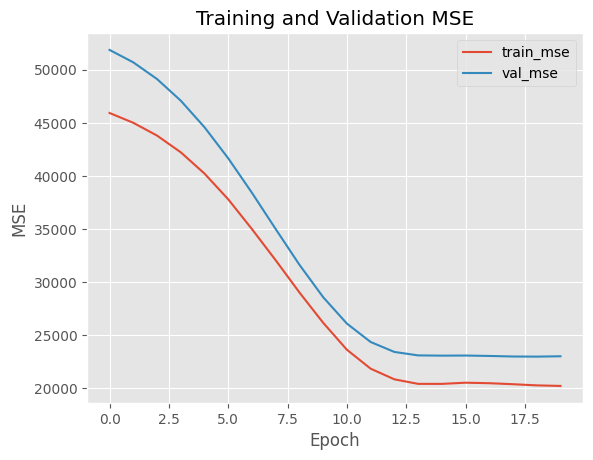

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H_cnn.history["mse"], label="train_mse")
plt.plot(np.arange(0, epochs), H_cnn.history["val_mse"], label="val_mse")
plt.title("Training and Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Los resultados obtenidos son peores que con el modelo tabular, lo cual no sorprende, ya que tratar de predecir el precio de alquiler de una vivienda con las fotos resulta mucho menos intuitivo que hacerlo a través de las características de la propia vivienda.

## 3.3. FINE TUNING

* Además de la etapa de regresión, también vamos a entrenar el último bloque convolucional

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

for layer in base_model.layers:
  layer.trainable = False
  if layer.name == "block5_conv3":
    layer.trainable = True

last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1024, activation="relu", name="fc1")(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="linear", name="predictions")(x)
cnn_model = Model(base_model.input, x)

# compilamos el modelo
cnn_model.compile(loss="mean_squared_error", optimizer=Adam(0.001), metrics=["mse"])
# vemos la nueva estructura del modelo
cnn_model.summary()




Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,250,250 (58.18 MB)

 Trainable params: 2,895,370 (11.04 MB)

 Non-trainable params: 12,354,880 (47.13 MB)

* Entrenamos el modelo pre-entrenado con Fine Tuning

In [ ]:
epochs = 20
batch_size = 512

H_cnn = cnn_model.fit(X_train_resized, y_train,
          batch_size=batch_size,
          validation_data=(X_val_resized, y_val),
          epochs=epochs)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 20s/step - loss: 44658.5234 - mse: 44658.5234 - val_loss: 44687.5508 - val_mse: 44687.5508
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 19s/step - loss: 33992.8125 - mse: 33992.8125 - val_loss: 24501.1738 - val_mse: 24501.1738
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 72s 19s/step - loss: 21768.2227 - mse: 21768.2227 - val_loss: 26233.6816 - val_mse: 26233.6816
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 17s/step - loss: 22671.5391 - mse: 22671.5391 - val_loss: 24145.7168 - val_mse: 24145.7168
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 17s/step - loss: 20978.7617 - mse: 20978.7617 - val_loss: 26299.6328 - val_mse: 26299.6328
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 92s 20s/step - loss: 21537.2305 - mse: 21537.2305 - val_loss: 23825.9727 - val_mse: 23825.9727
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 73s 17s/step - loss: 20014.4668 - mse: 20014.4668 - val_loss: 23233.7832 - val_mse: 23233.7832
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 17s/step - loss: 20505.4570 - mse: 20505.45

* Evaluamos el modelo

In [ ]:
scores = cnn_model.evaluate(X_test_resized, y_test, verbose=1)
print('Test MSE:', scores[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 770ms/step - loss: 18266.3125 - mse: 18266.3125
Test MSE: 16999.6015625


* Dibujamos el MSE durante el entrenamiento

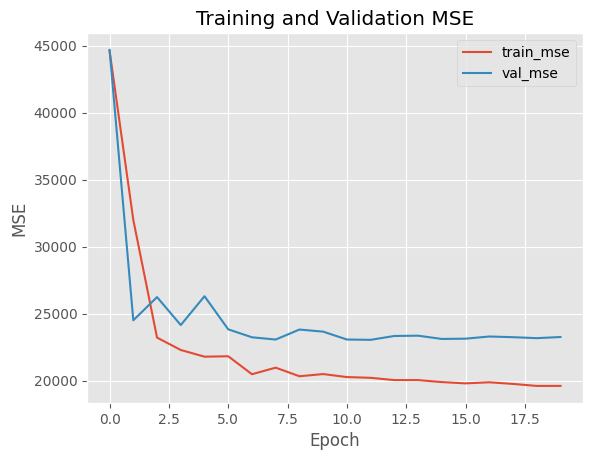

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H_cnn.history["mse"], label="train_mse")
plt.plot(np.arange(0, epochs), H_cnn.history["val_mse"], label="val_mse")
plt.title("Training and Validation MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Como podemos observar, el modelo ha empeorado. A pesar de mejorar el MSE del modelo, en este caso está sufriendo un claro overfitting, y la generalización del modelo ha disminuido.

## 3.4. LATE FUSION

In [ ]:
from tensorflow.keras.layers import Concatenate, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from sklearn.linear_model import LinearRegression


tabular_predictions = tabular_model.predict(x_test2, batch_size=batch_size)
cnn_predictions = cnn_model.predict(X_test_resized, batch_size=batch_size)

fused_predictions = np.concatenate([tabular_predictions, cnn_predictions], axis=1)

fusion_model = LinearRegression()
fusion_model.fit(fused_predictions, y_test)

final_predictions = fusion_model.predict(fused_predictions)
mse = mean_squared_error(y_test, final_predictions)
print(f"Late Fusion MSE: {mse}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


1/2 ━━━━━━━━━━━━━━━━━━━━ 13s 14s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step
Late Fusion MSE: 9153.832604539299


* Evaluamos el modelo

In [ ]:
# Evaluamos las predicciones finales
mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)

print(f"Late Fusion - Test MSE: {mse}")
print(f"Late Fusion - Test MAE: {mae}")

Late Fusion - Test MSE: 9153.832604539299
Late Fusion - Test MAE: 62.196851767263105


## 3.5. EARLY FUSION

In [ ]:
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Entrada para datos tabulares
tabular_input = Input(shape=(x_train2.shape[1],), name="tabular_input")
x_tabular = Dense(128, activation="relu")(tabular_input)
x_tabular = Dropout(0.2)(x_tabular)
x_tabular = Dense(64, activation="relu")(x_tabular)

# Entrada para imágenes
image_input = base_model.input
x_image = base_model.output
x_image = Flatten()(x_image)
x_image = Dense(1024, activation="relu")(x_image)
x_image = Dropout(0.5)(x_image)

# Fusionamos ambas ramas
merged = Concatenate()([x_tabular, x_image])
x = Dense(64, activation="relu")(merged)
x = Dropout(0.5)(x)
x = Dense(1, activation="linear")(x)

# Modelo Early Fusion
early_fusion_model = Model(inputs=[tabular_input, image_input], outputs=x)

early_fusion_model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])

* Entrenamos el modelo

In [ ]:
H_early = early_fusion_model.fit(
    [x_train2, X_train_resized], y_train,
    validation_data=([x_val2, X_val_resized], y_val),
    epochs=20,
    batch_size=512
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 229s 56s/step - loss: 95901.9688 - mse: 95901.9688 - val_loss: 52376.3945 - val_mse: 52376.3945
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 221s 56s/step - loss: 45269.6289 - mse: 45269.6289 - val_loss: 52786.3242 - val_mse: 52786.3242
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 260s 55s/step - loss: 45478.6367 - mse: 45478.6367 - val_loss: 52536.4648 - val_mse: 52536.4648
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 263s 55s/step - loss: 44966.3945 - mse: 44966.3945 - val_loss: 50052.3555 - val_mse: 50052.3555
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 262s 55s/step - loss: 40373.2148 - mse: 40373.2148 - val_loss: 30606.2773 - val_mse: 30606.2773
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 260s 55s/step - loss: 32428.3984 - mse: 32428.3984 - val_loss: 48294.4688 - val_mse: 48294.4688
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 264s 56s/step - loss: 41380.0781 - mse: 41380.0781 - val_loss: 48559.7461 - val_mse: 48559.7461
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 220s 56s/step - loss: 40408.5078 - mse: 

* Evaluamos el modelo

In [ ]:
scores = early_fusion_model.evaluate([x_test2, X_test_resized], y_test, verbose=1)
print(f"Early Fusion Test MSE: {scores[1]}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 746ms/step - loss: 15628.2988 - mse: 15628.2988
Early Fusion Test MSE: 14441.6787109375


## 4. CONCLUSIÓN

En definitiva, este proyecto no ha tenido como finalidad la creación de un modelo con un alto porcentaje de acierto, sino la comparación de diferentes modelos para una misma aplicación con el fin de comprobar el comportamiento de cada uno de ellos para una misma base de datos.

Hemos podido comprobar cómo los datos tabulares han sido más relevantes de cara a la predicción del precio objetivo, lo cual es totalmente razonable, ya que predecir el precio de alquiler de una vivienda vacacional únicamente a través de imágenes es bastante incongruente.

Además, hemos tenido que afrontar en varias ocasiones problemas de overfitting, los cuales han sido solucionados con una disminución de características, el uso de dropout, variaciones en el learning rate, batch size, épocas, etc.


Tal y como ya se mencionó, al cambiar de datos tabulares de una dimensión a datos de dos dimensiones mediante imágenes, las métricas de pérdida (en este caso el MSE y MAE) se han disparado y han aumentado considerablemente.

No obstante, al implementar los modelos de fusión que concatenan ambos resultados del modelo tabular y del modelo CNN, se han llegado a mejorar las métricas notablemente. Concretamente con el modelo de Late Fusion se ha obtenido el menor MSE con una diferencia importante respecto del resto de modelos.

En conclusión, no podemos afirmar haber obtenido un modelo efectivo, pero sí se puede deducir que de cara a afrontar el problema en cuestión, la predicción mediante datos tabulares es más efectiva. Sin embargo, la complementación con imágenes en los modelos de Late Fusion y Early Fusion han contribuido drásticamente en la disminución del MSE y MAE durante la predicción de precios de alquiler en viviendas vacacionales.